In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
from datetime import date
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import StandardScaler


In [2]:
tick = "INFY"
#tick = "AAPL"



In [4]:
START = "2000-01-01"
TODAY = date.today().strftime("%Y-%m-%d")


In [5]:
yf.download(tick, START, TODAY)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.890625,5.906250,5.462891,5.767578,3.811858,5331200
2000-01-04,5.641113,6.281250,5.570313,5.812500,3.841548,5056000
2000-01-05,5.476563,5.855469,5.328125,5.765625,3.810569,6054400
2000-01-06,5.598633,5.703125,5.156250,5.156250,3.407825,4704000
2000-01-07,4.945313,5.515625,4.703125,5.515625,3.645340,7884800
...,...,...,...,...,...,...
2024-03-19,18.690001,18.850000,18.629999,18.850000,18.850000,9561000
2024-03-20,18.670000,18.930000,18.639999,18.930000,18.930000,9677300
2024-03-21,18.350000,18.490000,18.129999,18.209999,18.209999,22905000


In [6]:
df=yf.download(tick, START, TODAY)

[*********************100%%**********************]  1 of 1 completed


In [7]:
df.tail(30)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-12,20.090000,20.240000,20.090000,20.139999,20.139999,4253200
2024-02-13,19.920000,20.010000,19.809999,19.860001,19.860001,6914100
2024-02-14,20.059999,20.200001,19.990000,20.180000,20.180000,7591100
2024-02-15,20.270000,20.330000,20.190001,20.309999,20.309999,5247500
2024-02-16,20.350000,20.580000,20.260000,20.469999,20.469999,5516600
2024-02-20,20.280001,20.400000,19.990000,20.020000,20.020000,7587200
2024-02-21,19.790001,19.940001,19.680000,19.780001,19.780001,6192500
2024-02-22,20.200001,20.360001,20.139999,20.309999,20.309999,6590200
2024-02-23,20.209999,20.260000,20.100000,20.110001,20.110001,4228200


In [8]:
df.shape

(6095, 6)

In [9]:
print(len(df))

6095


In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6.095000e+03
mean,7.984832,8.069979,7.899122,7.985999,6.704659,1.150395e+07
std,5.262109,5.293676,5.232983,5.264660,5.371571,8.956651e+06
min,1.015938,1.070938,0.956250,1.031875,0.683134,3.360000e+05
25%,4.553437,4.624687,4.485000,4.550000,3.133506,6.099400e+06
50%,6.886250,6.962500,6.806250,6.892500,5.191236,9.401500e+06
75%,9.140000,9.236875,9.050000,9.145000,7.599345,1.426060e+07
max,26.150000,26.389999,25.580000,26.200001,24.964008,1.475912e+08


Text(0.5, 1.0, 'Low')

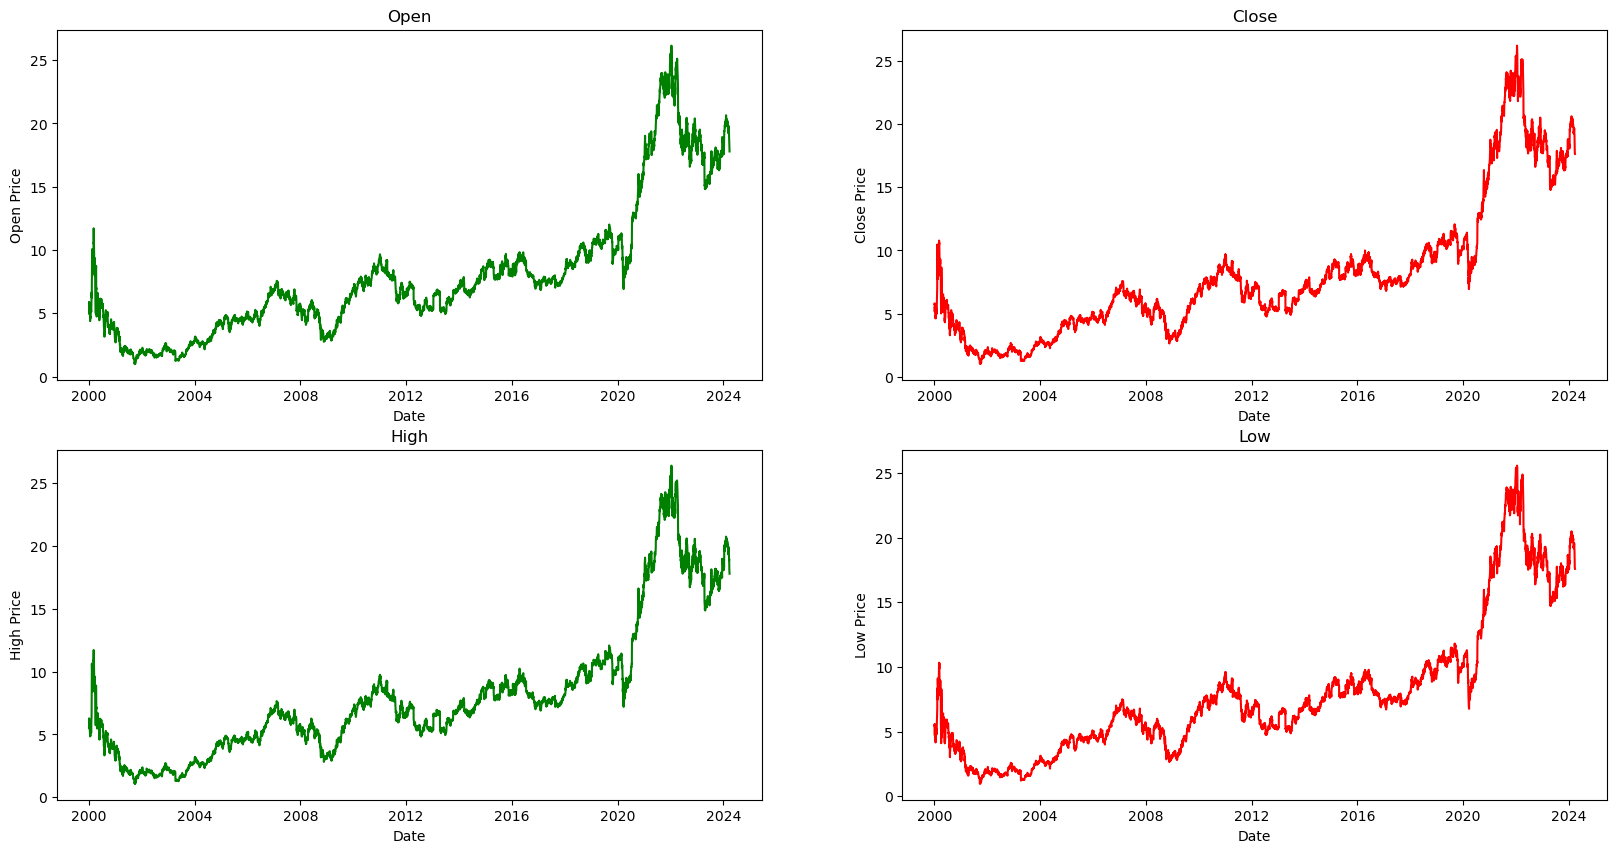

In [11]:
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.plot(df['Open'],color='green')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.plot(df['Close'],color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.plot(df['High'],color='green')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.plot(df['Low'],color='red')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low')


<Axes: xlabel='Date'>

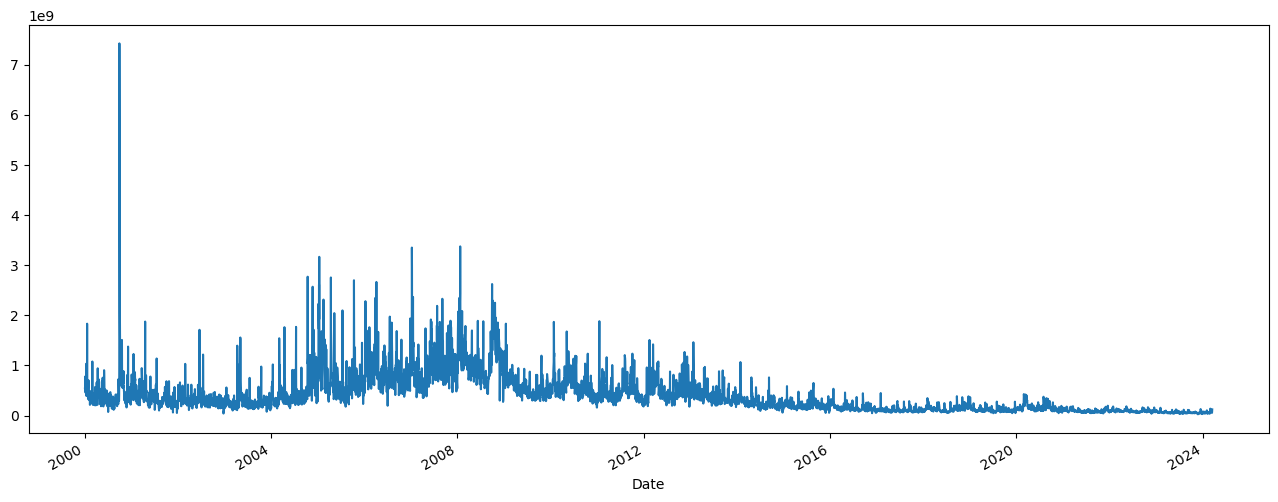

In [11]:
df['Volume'].plot(figsize=(16,6))


# linear regression

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler


In [13]:
x= df[['Open','High', 'Low', 'Volume']].values
y= df['Close'].values

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)

In [15]:
scaler = StandardScaler()

# Fit scaler on training data and transform training data
X_train_scaled = scaler.fit_transform(x_train)


In [16]:
print(x_train)

[[7.90179014e-01 8.27287972e-01 7.67857015e-01 4.06750400e+08]
 [2.71625004e+01 2.76049995e+01 2.71499996e+01 1.82404400e+08]
 [5.77250004e+00 5.86571407e+00 5.76464319e+00 4.31152400e+08]
 ...
 [1.15279999e+02 1.17000000e+02 1.14919998e+02 1.00506900e+08]
 [1.26169998e+02 1.26320000e+02 1.24830002e+02 7.10576000e+07]
 [3.02500010e-01 3.04286003e-01 2.96963990e-01 2.59952000e+08]]


In [17]:
# Initialize Linear Regression model
model = LinearRegression()


In [18]:
# Perform cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

In [19]:
# Convert the negative MSE scores to positive
cv_scores = -cv_scores

In [20]:
# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.19776392 0.19501664 0.16975012 0.16319321 0.17084182]
Mean CV Score: 0.17931314306541668


In [21]:
# Train the model on the entire training set
model.fit(X_train_scaled, y_train)

# Transform testing data using the same scaler
X_test_scaled = scaler.transform(x_test)

# Make predictions on the test set
predictions = model.predict(X_test_scaled)

In [84]:
predictions

array([[ 47.72999963],
       [ 47.52000052],
       [ 47.25000007],
       ...,
       [171.13000517],
       [173.00000028],
       [172.61999541]])

In [23]:
print(model.coef_)

[-3.48053232e+01  4.50136790e+01  4.29849022e+01  5.12342054e-03]


In [24]:
print(model.intercept_)

37.818894749141364


In [25]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
print('The model score is Testing :', model.score(X_test_scaled,y_test))
print('The model score is Training :', model.score(X_train_scaled,y_train))

The model score is Testing : 0.9999456649628469
The model score is Training : 0.9999382301708559


In [26]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error on Test Set:", mse)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error on Test Set:", mae)
#from sklearn.metrics import mean_squared_error
def root_mean_squared_error(y_test, predictions):
    root_mean_squared_error = mean_squared_error(y_test, predictions, squared=False)
    return root_mean_squared_error
rmse= root_mean_squared_error(y_test, predictions)
print("Root Mean Squared Error on Test Set:", rmse)

Mean Squared Error on Test Set: 0.13652777402419589
Mean Absolute Error on Test Set: 0.15382322050037694
Root Mean Squared Error on Test Set: 0.3694966495439382


In [27]:
from sklearn.metrics import r2_score 
r2_score(y_test, predictions)

0.9999456649628469

In [28]:
import numpy as np
import pandas as pd

In [29]:
newdata=pd.DataFrame(y_test, predictions)
newdata=pd.DataFrame({'Actual Price' :y_test.flatten(), 'Predicted Price' :predictions.flatten() })
print(newdata.head(10))

   Actual Price  Predicted Price
0     10.398571        10.436943
1     22.726429        22.690944
2    193.220001       194.222490
3      0.429821         0.426552
4     20.816071        20.802483
5      9.241786         9.205562
6      0.333705         0.338041
7      0.427143         0.424547
8      2.958214         2.945070
9     40.735001        40.652887


In [187]:
newdata.to_excel('predicted_prices.xlsx', index=False)

<Axes: >

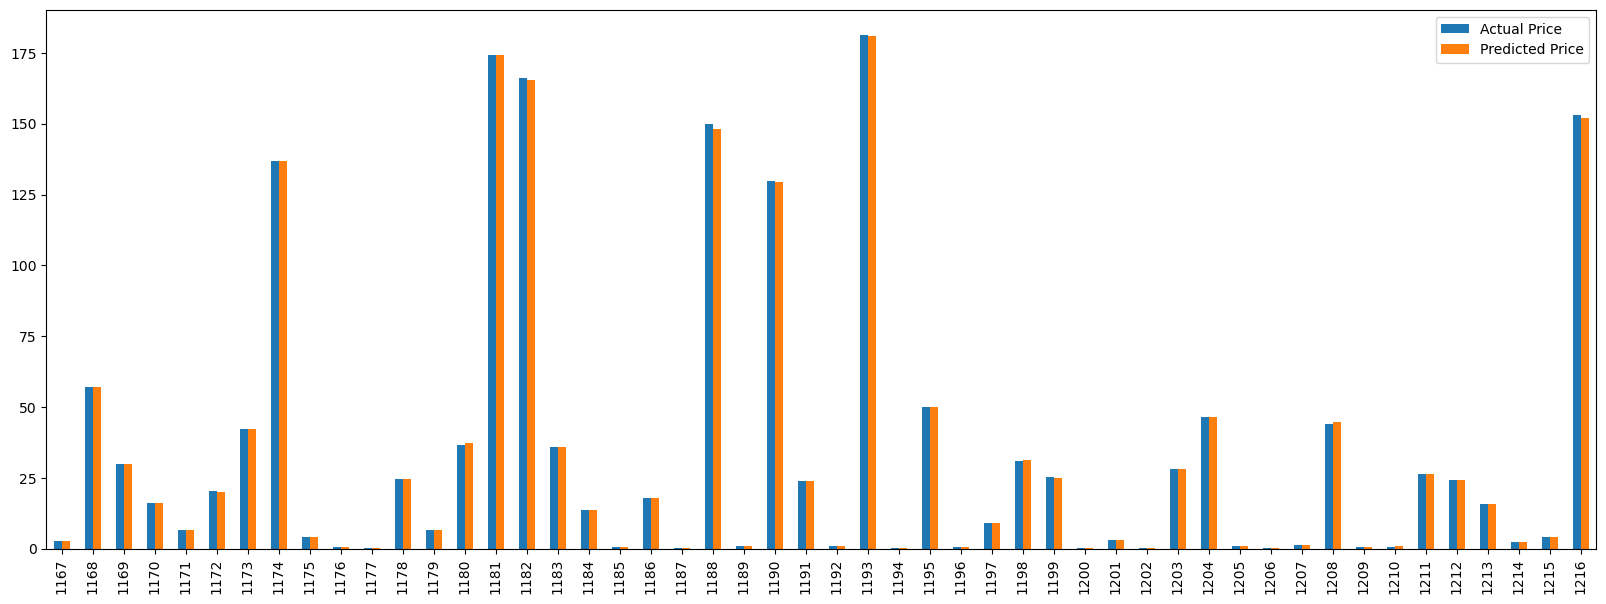

In [188]:
graph=newdata.tail(50)
graph.plot(kind='bar', figsize=(20,7))

# RandomForestRegressor

In [189]:
x= df[['High', 'Low', 'Open', 'Volume']].values
y= df['Close'].values


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)

In [190]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score
model = RandomForestRegressor()

In [191]:
scaler = StandardScaler()
# Fit scaler on training data and transform training data
X_train_scaled = scaler.fit_transform(x_train)

In [192]:
# Perform cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
# Convert the negative MSE scores to positive
cv_scores = -cv_scores

In [193]:
# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.37291223 0.25731319 0.32981438 0.25994881 0.3351306 ]
Mean CV Score: 0.31102384261141225


In [194]:
# Train the model on the entire training set
model.fit(X_train_scaled, y_train)
# Transform testing data using the same scaler
X_test_scaled = scaler.transform(x_test)
predictions = model.predict(X_test_scaled) # Make predictions on the test set

In [195]:
print('The model score is Testing :', model.score(X_test_scaled,y_test))
print('The model score is Training :', model.score(X_train_scaled,y_train))

The model score is Testing : 0.9998924161421257
The model score is Training : 0.9999847997326982


In [196]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error on Test Set:", mse)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error on Test Set:", mae)
#from sklearn.metrics import mean_squared_error
def root_mean_squared_error(y_test, predictions):
    root_mean_squared_error = mean_squared_error(y_test, predictions, squared=False)
    return root_mean_squared_error
rmse= root_mean_squared_error(y_test, predictions)
print("Root Mean Squared Error on Test Set:", rmse)

Mean Squared Error on Test Set: 0.2968230649699748
Mean Absolute Error on Test Set: 0.2333954317611852
Root Mean Squared Error on Test Set: 0.544814707005946


In [197]:
from sklearn.metrics import r2_score 
r2_score(y_test, predictions)

0.9998924161421257

In [198]:
newdata=pd.DataFrame(y_test, predictions)
newdata=pd.DataFrame({'Actual Price' :y_test.flatten(), 'Predicted Price' :predictions.flatten()})
print(newdata.tail(13))

      Actual Price  Predicted Price
1204     46.349998        46.276225
1205      1.062500         1.061342
1206      0.258929         0.262217
1207      1.448571         1.436480
1208     44.172501        44.915700
1209      0.507143         0.515729
1210      0.779157         0.780642
1211     26.450001        26.474575
1212     24.297501        24.207643
1213     15.710000        15.926950
1214      2.535357         2.552975
1215      4.228571         4.318918
1216    152.990005       151.977196


<Axes: >

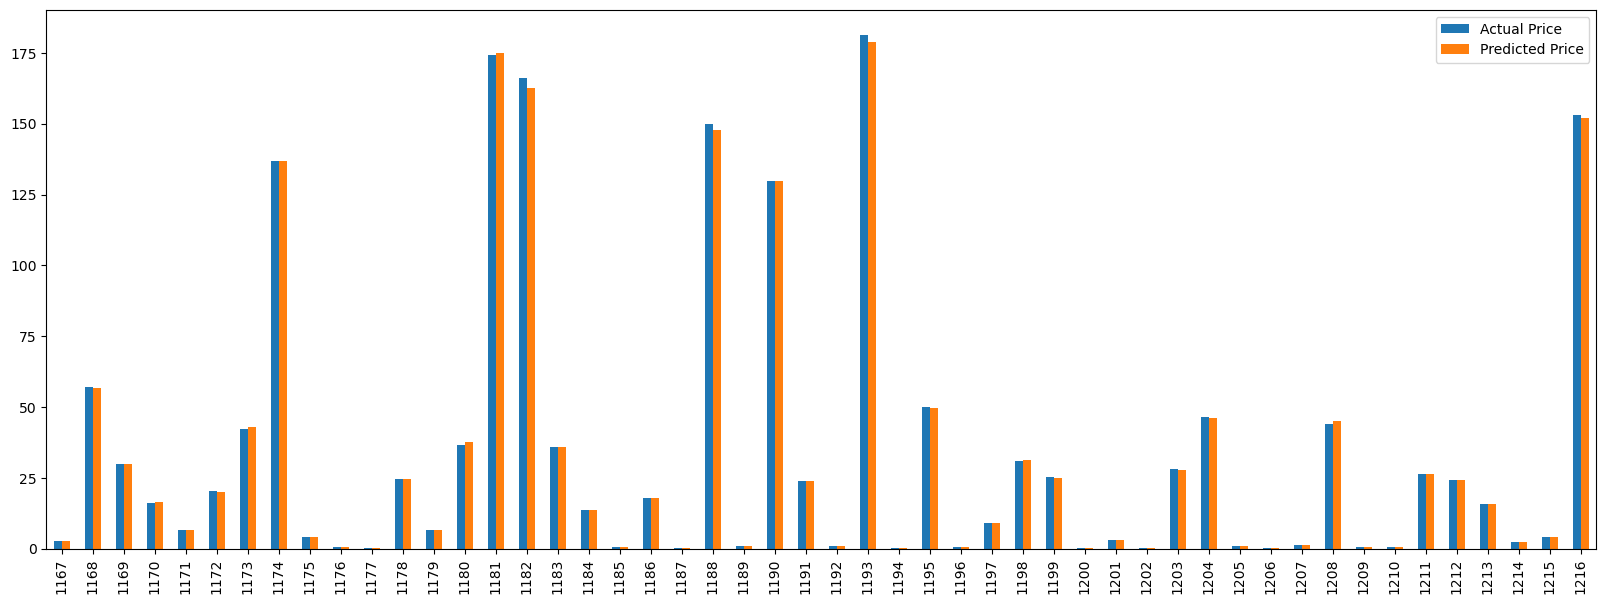

In [199]:
graph=newdata.tail(50)
graph.plot(kind='bar', figsize=(20,7))

# Decision Tree Regressor

In [200]:
x= df[['High', 'Low', 'Open', 'Volume']].values
y= df['Close'].values


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)

In [201]:
from sklearn.tree import DecisionTreeRegressor
model= DecisionTreeRegressor()

In [202]:
scaler = StandardScaler()
# Fit scaler on training data and transform training data
X_train_scaled = scaler.fit_transform(x_train)

In [203]:
# Perform cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores = -cv_scores  # Convert the negative MSE scores to positive

In [204]:
# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.57523749 0.45315214 0.61259758 0.54589969 0.5370873 ]
Mean CV Score: 0.544794841514418


In [205]:
# Train the model on the entire training set
model.fit(X_train_scaled, y_train)
# Transform testing data using the same scaler
X_test_scaled = scaler.transform(x_test)
# Make predictions on the test set
predictions = model.predict(X_test_scaled)

In [206]:
print('The model score is Testing :', model.score(X_test_scaled,y_test))
print('The model score is Training :', model.score(X_train_scaled,y_train))

The model score is Testing : 0.9998353971995949
The model score is Training : 1.0


In [207]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error on Test Set:", mse)

mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error on Test Set:", mae)
#from sklearn.metrics import mean_squared_error
def root_mean_squared_error(y_test, predictions):
    root_mean_squared_error = mean_squared_error(y_test, predictions, squared=False)
    return root_mean_squared_error
rmse= root_mean_squared_error(y_test, predictions)
print("Root Mean Squared Error on Test Set:", rmse)

Mean Squared Error on Test Set: 0.4541379039960153
Mean Absolute Error on Test Set: 0.28336417701955496
Root Mean Squared Error on Test Set: 0.6738975471063946


In [208]:
from sklearn.metrics import r2_score 
r2_score(y_test, predictions)

0.9998353971995949

In [209]:
newdata=pd.DataFrame(y_test, predictions)
newdata=pd.DataFrame({'Actual Price' :y_test.flatten(), 'Predicted Price' :predictions.flatten()})
print(newdata.tail(13))

      Actual Price  Predicted Price
1204     46.349998        46.375000
1205      1.062500         1.075893
1206      0.258929         0.267679
1207      1.448571         1.420000
1208     44.172501        45.227501
1209      0.507143         0.528214
1210      0.779157         0.766183
1211     26.450001        26.420000
1212     24.297501        24.282499
1213     15.710000        15.877500
1214      2.535357         2.539643
1215      4.228571         4.293571
1216    152.990005       151.289993


<Axes: >

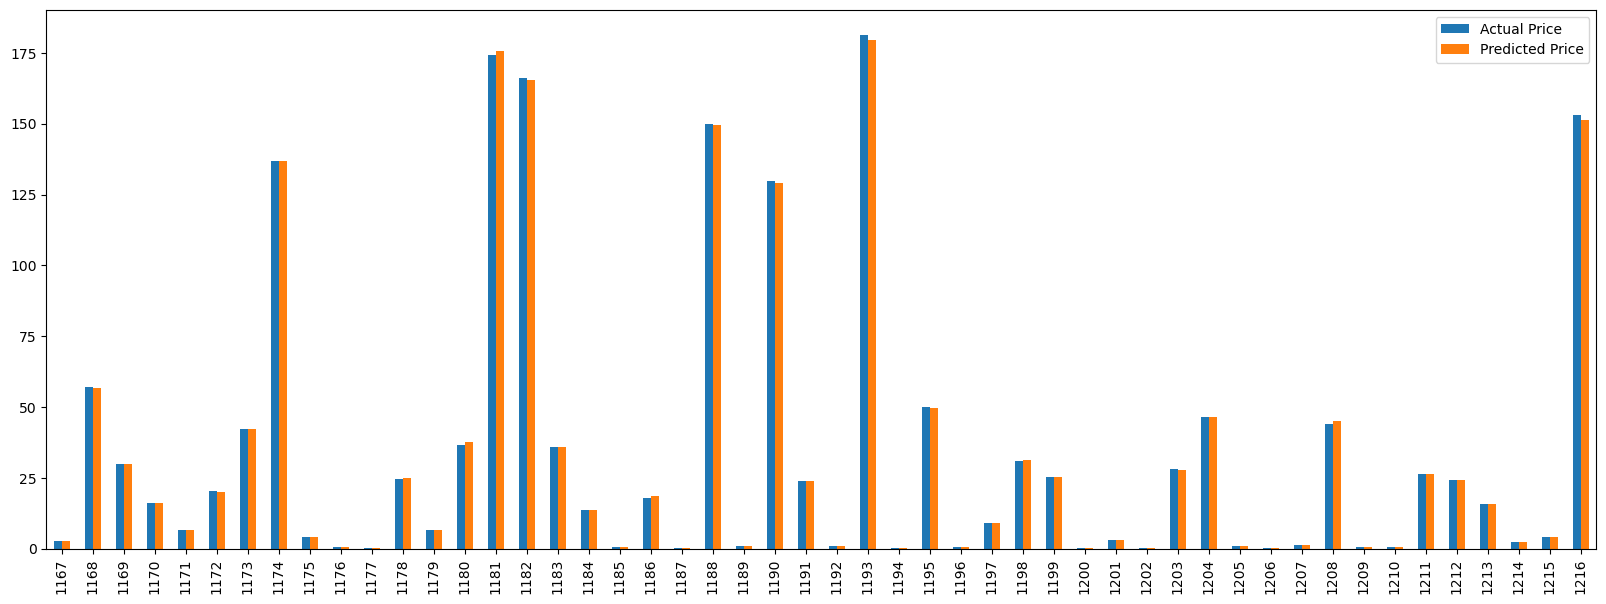

In [210]:
graph=newdata.tail(50)
graph.plot(kind='bar', figsize=(20,7))

# KNeighborsRegressor

In [211]:
x= df[['High', 'Low', 'Open', 'Volume']].values
y= df['Close'].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)

In [212]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()

In [213]:
scaler = StandardScaler()
# Fit scaler on training data and transform training data
X_train_scaled = scaler.fit_transform(x_train)

In [214]:
# Perform cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
# Convert the negative MSE scores to positive
cv_scores = -cv_scores

In [215]:
# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.74183529 0.54011427 0.63204573 0.67757581 0.70637998]
Mean CV Score: 0.6595902152043722


In [216]:
# Train the model on the entire training set
model.fit(X_train_scaled, y_train)
# Transform testing data using the same scaler
X_test_scaled = scaler.transform(x_test)
# Make predictions on the test set
predictions = model.predict(X_test_scaled)

In [217]:
print('The model score is Testing :', model.score(X_test_scaled,y_test))
print('The model score is Training :', model.score(X_train_scaled,y_train))

The model score is Testing : 0.9998350568438547
The model score is Training : 0.9998676336226751


In [218]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error on Test Set:", mse)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error on Test Set:", mae)
#from sklearn.metrics import mean_squared_error
def root_mean_squared_error(y_test, predictions):
    root_mean_squared_error = mean_squared_error(y_test, predictions, squared=False)
    return root_mean_squared_error
rmse= root_mean_squared_error(y_test, predictions)
print("Root Mean Squared Error on Test Set:", rmse)

Mean Squared Error on Test Set: 0.4550769429558533
Mean Absolute Error on Test Set: 0.3820182621087221
Root Mean Squared Error on Test Set: 0.6745939096640684


In [219]:
from sklearn.metrics import r2_score 
r2_score(y_test, predictions)

0.9998350568438547

In [220]:
newdata=pd.DataFrame(y_test, predictions)
newdata=pd.DataFrame({'Actual Price' :y_test.flatten(), 'Predicted Price' :predictions.flatten()})
print(newdata.tail(13))

      Actual Price  Predicted Price
1204     46.349998        46.740000
1205      1.062500         0.662196
1206      0.258929         0.274571
1207      1.448571         1.175339
1208     44.172501        45.145000
1209      0.507143         0.407357
1210      0.779157         0.932424
1211     26.450001        26.627000
1212     24.297501        23.694143
1213     15.710000        15.364643
1214      2.535357         2.543357
1215      4.228571         4.459643
1216    152.990005       152.107996


<Axes: >

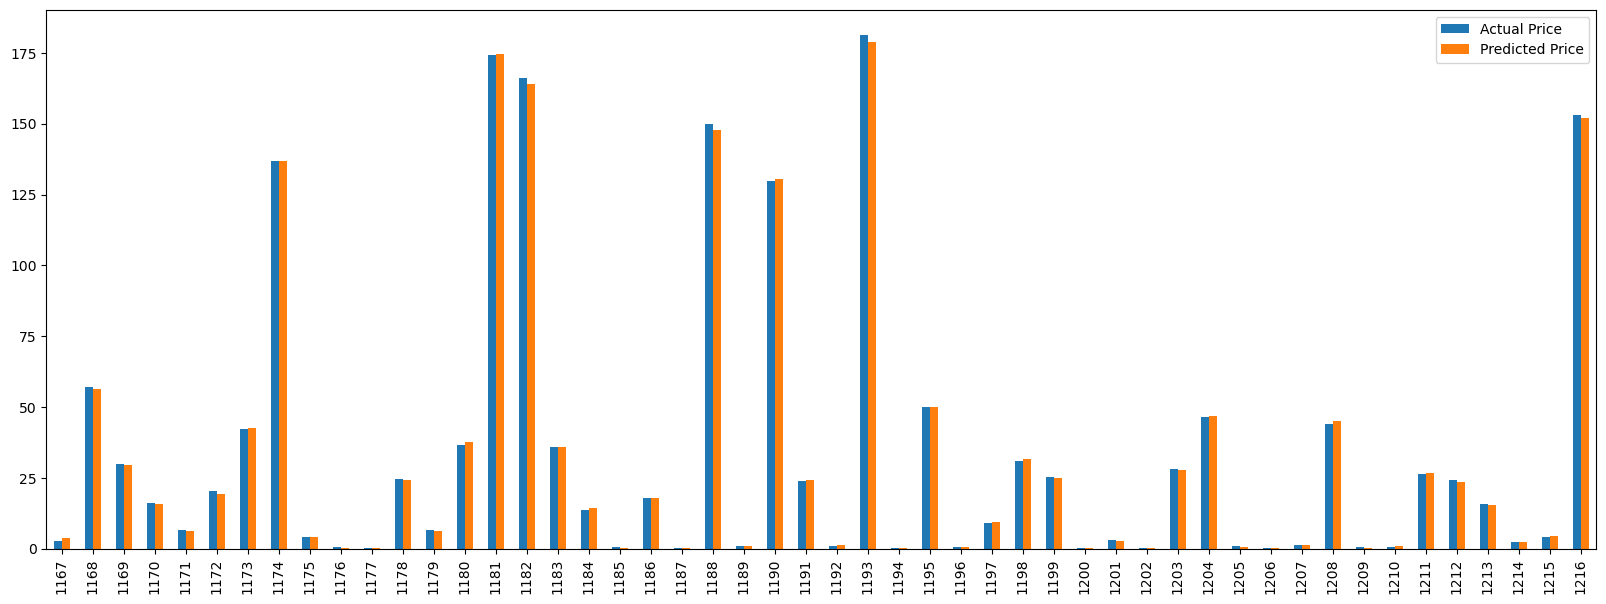

In [221]:
graph=newdata.tail(50)
graph.plot(kind='bar', figsize=(20,7))

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
from datetime import date
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


In [4]:
tick = "INFY"
#tick = "AAPL"



In [5]:

#df=yf.download(tick)
start='2010-08-10'
TODAY = date.today().strftime("%Y-%m-%d")
data = yf.download(tick, start, TODAY)
# Function to create lag features
def create_lag_features(data, lag_days):
    for i in range(1, lag_days + 1):
        data[f'lag_{i}'] = data['Close'].shift(i)
    return data

# Function to prepare data for training
def prepare_data(data, lag_days):
    data = create_lag_features(data, lag_days)
    data.dropna(inplace=True)
    X = data.drop(['Close'], axis=1)
    y = data['Close']
    return X, y

# Function to forecast future prices
def forecast_prices(model, last_data_point, num_days):
    forecast = []
    last_data_point = np.array(last_data_point).reshape(1, -1)
    for i in range(num_days):
        prediction = model.predict(last_data_point)
        forecast.append(prediction[0])
        last_data_point = np.roll(last_data_point, -1)
        last_data_point[0, -1] = prediction
    return forecast

# Prepare data
lag_days = 10
X, y = prepare_data(data, lag_days)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
#rf_regressor=LinearRegression()
rf_regressor.fit(X_train, y_train)
# Evaluate model
y_pred_train = rf_regressor.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print("Training MSE:", mse_train)

y_pred_test = rf_regressor.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Testing MSE:", mse_test)
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Forecast future prices
last_date = data.index[-1]
date_range = pd.date_range(start=last_date, periods=30)  # Include Saturdays and Sundays
date_range = date_range[date_range.weekday < 5]  # Filter out Saturdays and Sundays

#date_range = date_range[1:]  # Exclude last date and start from the next day (Monday)
#last_data_point = data.tail(1).drop(['Close'], axis=1).values.flatten()
#forecast_cp = forecast_prices(rf_regressor, last_data_point, num_days=len(date_range))
#forecast_lowprice -= 30

# Combine dates with forecasted values
#forecast_df = pd.DataFrame({'Date': date_range, 'Forecasted_CP': forecast_cp})
#print(forecast_df)
#st.subheader('30 days forecasted price')
#st.write(forecast_df)

[*********************100%%**********************]  1 of 1 completed
Training MSE: 0.0007206272455162692
Testing MSE: 0.005140607471438436


In [6]:
import holidays
from datetime import date

# Define the country for which you want to identify public holidays
country = 'IN'  # Example: United States

# Create a Holiday object for the specified country
us_holidays = holidays.CountryHoliday(country)

# Define the date range for which you want to check public holidays
start_date = date(2024, 1, 1)
end_date = date(2024, 12, 31)

# Iterate through the date range and check if each date is a public holiday
public_holidays = []
for single_date in pd.date_range(start_date, end_date):
    if single_date in us_holidays:
        public_holidays.append(single_date)

print("Public holidays in", country, "for the year 2024:", public_holidays)


Public holidays in IN for the year 2024: [Timestamp('2024-01-14 00:00:00', freq='D'), Timestamp('2024-01-26 00:00:00', freq='D'), Timestamp('2024-03-24 00:00:00', freq='D'), Timestamp('2024-03-25 00:00:00', freq='D'), Timestamp('2024-03-29 00:00:00', freq='D'), Timestamp('2024-03-31 00:00:00', freq='D'), Timestamp('2024-04-10 00:00:00', freq='D'), Timestamp('2024-04-11 00:00:00', freq='D'), Timestamp('2024-05-01 00:00:00', freq='D'), Timestamp('2024-05-19 00:00:00', freq='D'), Timestamp('2024-06-16 00:00:00', freq='D'), Timestamp('2024-06-17 00:00:00', freq='D'), Timestamp('2024-07-16 00:00:00', freq='D'), Timestamp('2024-08-15 00:00:00', freq='D'), Timestamp('2024-09-15 00:00:00', freq='D'), Timestamp('2024-10-02 00:00:00', freq='D'), Timestamp('2024-11-01 00:00:00', freq='D'), Timestamp('2024-12-25 00:00:00', freq='D')]


In [7]:
date_range = [d for d in date_range if d not in public_holidays]

date_range = date_range[1:]  # Exclude last date and start from the next day (Monday)

last_data_point = data.tail(1).drop(['Close'], axis=1).values.flatten()
forecast_cp = forecast_prices(rf_regressor, last_data_point, num_days=len(date_range))

# Combine dates with forecasted values
forecast_df = pd.DataFrame({'Date': date_range, 'Forecasted_CP': forecast_cp})
print(forecast_df)

         Date  Forecasted_CP
0  2024-04-29        16.9512
1  2024-04-30        16.8790
2  2024-05-02        18.6892
3  2024-05-03        20.0758
4  2024-05-06        16.9564
5  2024-05-07        16.9622
6  2024-05-08        17.1369
7  2024-05-09        17.0964
8  2024-05-10        16.6560
9  2024-05-13        16.8067
10 2024-05-14        16.7397
11 2024-05-15        16.9837
12 2024-05-16        17.2325
13 2024-05-17        17.4963
14 2024-05-20        16.9029
15 2024-05-21        16.9748
16 2024-05-22        19.5307
17 2024-05-23        18.1891
18 2024-05-24        16.8920
